# Getting started with NeuroLogic programming

The following example aims to familiarize the reader with the proposed formalism and briefly illustrate its benefits. The goal for the learned model is to  predict (compute) score of words in Scrabble\footnote{Further, bonus points are added for selected bi-grams to demonstrate the use of rules with more than one literal in the body.}.

The model is described as a weighted logic program, further referred to as a template.
The template reflects the high-level structure of the resulting models and possibly some background knowledge about the problem. In Srabble for instance, we know that every letter affects the score of a word. To make the situation more interesting, we will consider that the same holds for bi-grams of letters. To encode the knowledge, we use Horn clauses (also called rules).

Each rule is in the following format: 
$$
\underbrace{\texttt{0.0}}_{\text{weight}}\texttt{ }\underbrace{\texttt{score()}}_{\text{rule head}} \texttt{ :- }\underbrace{\texttt{letterA(X)}}_{\text{rule tail}}. \underbrace{\texttt{[lukasiewicz]}}_{\text{activation function (optional)}}
$$
Weight of the rule is either learnable (then the weight represents the initial value for learning with the exception of $0.0$, where the initial weight value will be randomly generated) or fixed (fixed weights are enclosed in angle brackets).
In our sample scenario, we do not know the weight of any letter, and so every rule in this example will have learnable weight. The template for this problem will look as follows\footnote{for the whole template see \fullref{scrabble---template} }.

### Template

In [6]:
%%writefile rules.pl
0.0 cardGroupOnPlace(CardGroup,Place) :- cardOnPlace(Suit,Rank,Place),_member(Suit,[spades,diamonds,hearts,clubs]),_member(Rank,[2,3,4,5]),_member(CardGroup,[2,3,4,5]). [^Suit,^Rank,^CardGroup]
0.0 score() :- cardGroupOnPlace(CardType1,Place1),follows(CardType1,CardType2),cardGroupOnPlace(CardType2,Place2),@alldiff(Place1,Place2),_member(CardType1,[2,3,4]). [^CardType1]
<1.0> follows(2,3).    
<1.0> follows(3,4).    
<1.0> follows(4,5).    

Overwriting rules.pl


The training set consists of grounded rules. These rules act as examples to learn the right weights in the lifted (templated) model. Every example should be provable from the (learned) model. In this particular example, we know only scores for some words, the corresponding rules will be in the following format.
  $$
     \underbrace{\texttt{7.0}}_{\text{desired output}}\texttt{ }\underbrace{\texttt{score()}}_{\text{query}} \texttt{ :- }\underbrace{\texttt{letterH(l1),letterI(l2),next(l1,l2)}}_{\text{evidence}}.
  $$

### Training set

In [7]:
%%writefile training_set.pl
3 score() :- cardOnPlace(spades,2,first),cardOnPlace(hearts,3,second).

Overwriting training_set.pl


# Setup & Start Learning phase (may take a while to finish)


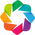

java -jar './neurologic.jar' --examples=./.examples_raw.pl --rules=./.rules_raw.pl


In [8]:
from neurologic import run, plot_statistics, learned_template
import holoviews as hv
hv.notebook_extension('bokeh')

output = run("rules.pl","training_set.pl")

# Results: Learning curve

In [9]:
%%opts Curve [width=625 height=400]
plot_statistics(output)

:DynamicMap   [fold,restart,error type]

# Results: Learned template

In [10]:
print(learned_template(output))

cardGroupOnPlace_V63(5,Place) :- cardOnPlace(clubs,5,Place).
cardGroupOnPlace_V62(4,Place) :- cardOnPlace(clubs,5,Place).
cardGroupOnPlace_V61(3,Place) :- cardOnPlace(clubs,5,Place).
cardGroupOnPlace_V60(2,Place) :- cardOnPlace(clubs,5,Place).
cardGroupOnPlace_V59(5,Place) :- cardOnPlace(clubs,4,Place).
cardGroupOnPlace_V58(4,Place) :- cardOnPlace(clubs,4,Place).
cardGroupOnPlace_V57(3,Place) :- cardOnPlace(clubs,4,Place).
cardGroupOnPlace_V56(2,Place) :- cardOnPlace(clubs,4,Place).
cardGroupOnPlace_V55(5,Place) :- cardOnPlace(clubs,3,Place).
cardGroupOnPlace_V54(4,Place) :- cardOnPlace(clubs,3,Place).
cardGroupOnPlace_V53(3,Place) :- cardOnPlace(clubs,3,Place).
cardGroupOnPlace_V52(2,Place) :- cardOnPlace(clubs,3,Place).
cardGroupOnPlace_V51(5,Place) :- cardOnPlace(clubs,2,Place).
cardGroupOnPlace_V50(4,Place) :- cardOnPlace(clubs,2,Place).
cardGroupOnPlace_V49(3,Place) :- cardOnPlace(clubs,2,Place).
cardGroupOnPlace_V48(2,Place) :- cardOnPlace(clubs,2,Place).
cardGroupOnPlace_V47(5,P

In [3]:
import pandas as pd
import numpy as np

In [10]:
a = pd.DataFrame(np.random.randn(2,4),columns=['A', 'B', 'C', 'D'])

In [18]:
a.T[1]

A   -1.154481
B    0.579147
C    0.933523
D   -0.593459
Name: 1, dtype: float64

In [1]:
from neurologic.config import neurologic_parser
tree = neurologic_parser.parse("0.0 a() :- b().")

In [2]:
tree

Tree(rule_file, [Tree(weighted_rule_without_metadata, [Tree(initial_weight, [Token(SIGNED_NUMBER, '0.0')]), Tree(rule, [Tree(normal_atomic_formula, [Token(PREDICATE, 'a'), Tree(term_list, [])]), Tree(normal_atomic_formula, [Token(PREDICATE, 'b'), Tree(term_list, [])])])])])